100%|██████████| 20/20 [00:00<00:00, 338.86it/s]


(5, 20)


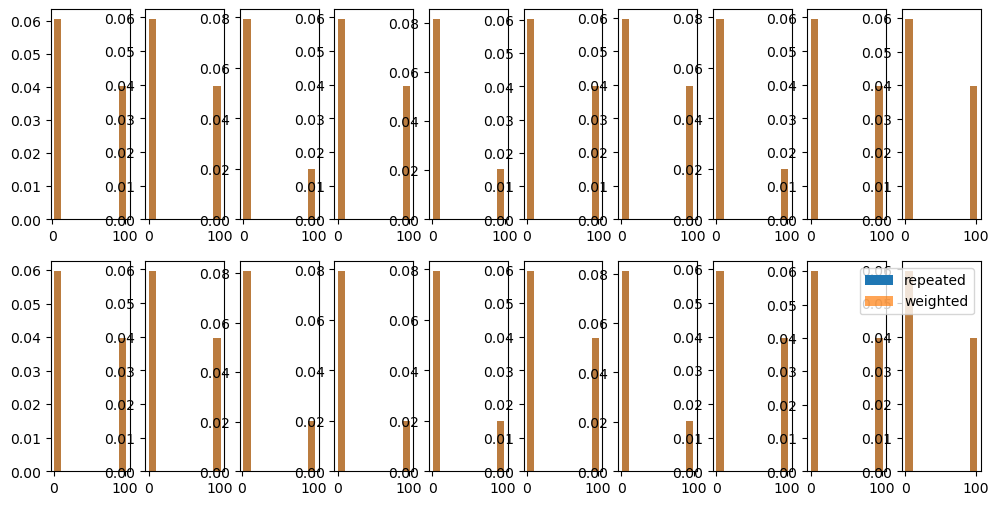

Finished looping till the maximum random state, 20 for estimator <class 'sklearn.cluster._bisect_k_means.BisectingKMeans'> in ---- 0.5582089424133301 s---
Minimum p-values:  0.0335416594061465
<class 'sklearn.preprocessing._discretization.KBinsDiscretizer'> with different random state led to the same predictions


100%|██████████| 20/20 [00:00<00:00, 521.95it/s]

(5, 20)


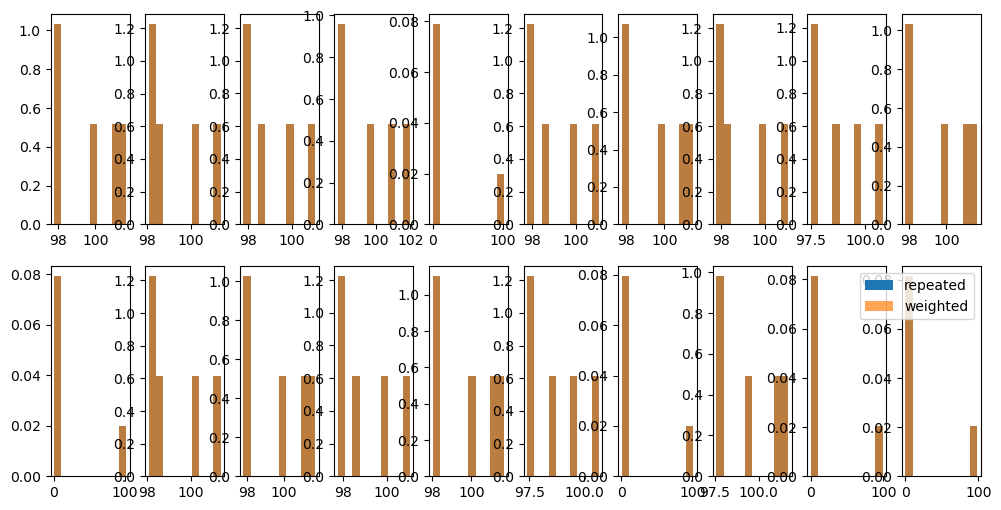

Finished looping till the maximum random state, 20 for estimator <class 'sklearn.cluster._kmeans.KMeans'> in ---- 0.5021381378173828 s---
Minimum p-values:  0.0335416594061465


100%|██████████| 20/20 [00:00<00:00, 213.74it/s]

(5, 20)


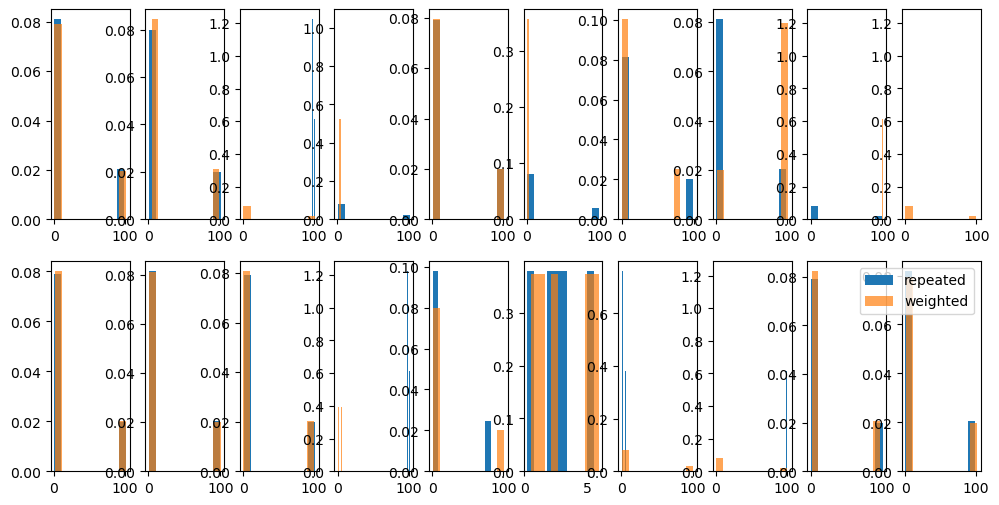

Finished looping till the maximum random state, 20 for estimator <class 'sklearn.cluster._kmeans.MiniBatchKMeans'> in ---- 0.57535719871521 s---
Minimum p-values:  0.0335416594061465


100%|██████████| 20/20 [00:00<00:00, 51.60it/s]

<class 'sklearn.ensemble._forest.RandomTreesEmbedding'> with different random state led to the same predictions


,Name,p_values,min_p_value,avg_p_value
0,BisectingKMeans,"[0.33559098126008213, 0.0335416594061465, 0.03...",0.033542,0.093952
1,KMeans,"[0.0335416594061465, 0.0335416594061465, 0.033...",0.033542,0.141101
2,MiniBatchKMeans,"[0.0335416594061465, 0.08105771161340149, 0.17...",0.033542,0.239212


In [2]:
import pandas as pd
from sample_weight_audit import weighted_repeated_fit_equivalence_test
import threadpoolctl

threadpoolctl.threadpool_limits(limits=1)
import warnings
warnings.filterwarnings("ignore")

from sklearn import utils
from inspect import signature

ests = utils.all_estimators(type_filter='transformer')

df = []

for est in ests:
    est = est[1]
    
    if 'random_state' in signature(est).parameters and 'sample_weight' in signature(est.fit).parameters:
        ## record in dataframe name of estimator, and all pvalues and minimum pvalue and average pvalue
        try:
            df.append(paired_test(est, n_features = 10, test='ed_perm', max_seed=20,
                    train_size = 300, n_samples_per_cv_group=500,
                    rep_test_size = 5, max_repeats=3,
                    correct_threshold=True, equal_var=False,issparse=False,plot=True))
        except ValueError:
            print(est, "with different random state led to the same predictions")
        
df = pd.DataFrame(df)
df.sort_values(by=['min_p_value'])

